In [1]:
#imports
import mlflow
import mlflow.sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split , GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report



In [2]:
df = pd.read_excel("default of credit card clients.xls")

In [3]:
df.shape

(30000, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

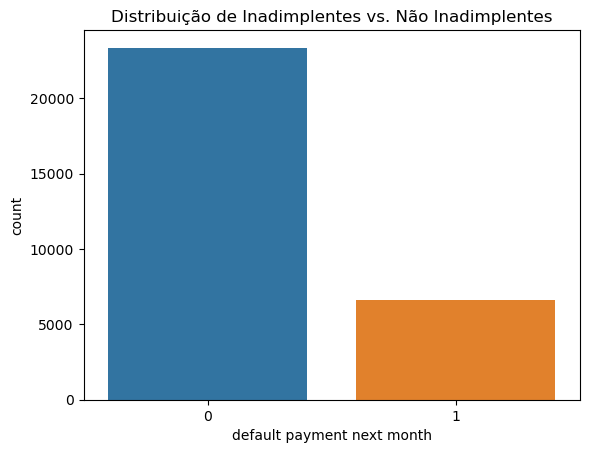

In [7]:
sns.countplot(x=df["default payment next month"])
plt.title("Distribuição de Inadimplentes vs. Não Inadimplentes")
plt.show()


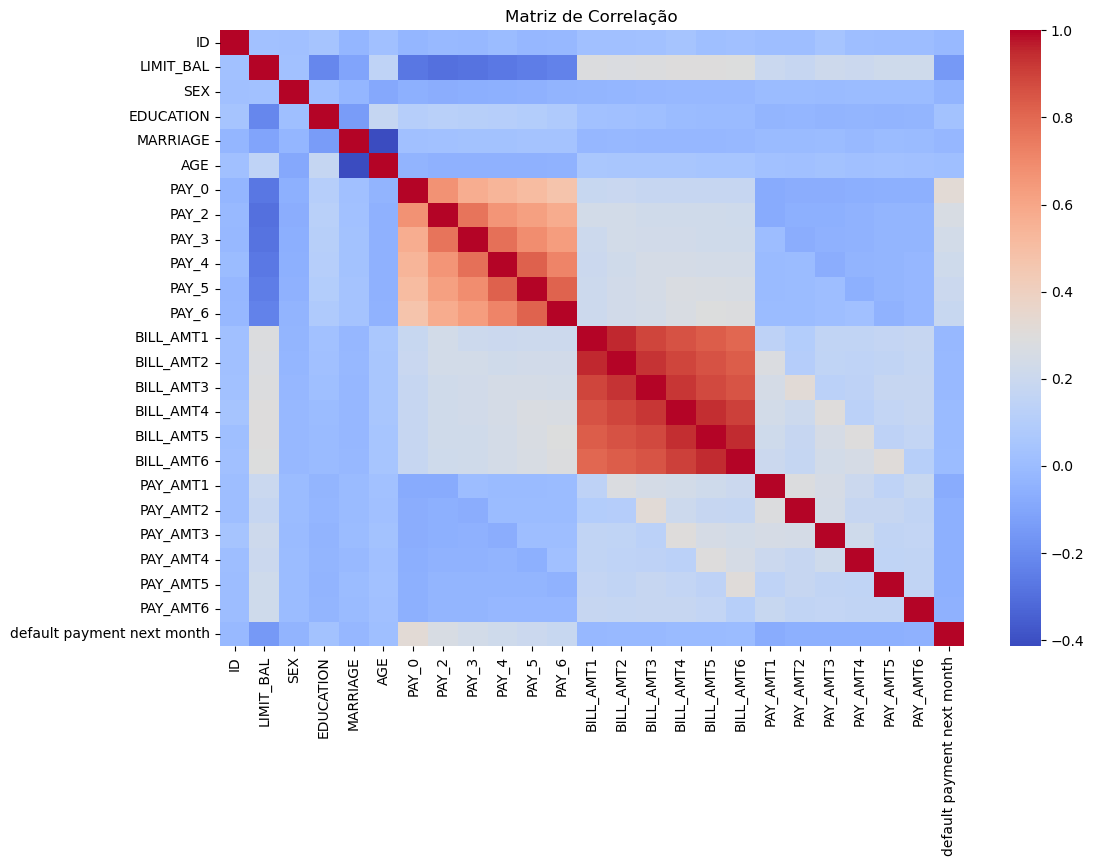

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Matriz de Correlação")
plt.show()


In [9]:
#Separar features e target
X = df.drop(columns=["default payment next month"])  # Remover a variável alvo
y = df["default payment next month"]

In [10]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
scaler = StandardScaler()

In [12]:
X_train_scaller = scaler.fit_transform(X_train)
X_test_scaller = scaler.fit_transform(X_test)

In [13]:
# Criar dicionário de modelos para treinar e comparar
modelos = {
    "Logistic Regression": LogisticRegression(class_weight="balanced"),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(class_weight="balanced")
}

In [14]:
# Treinar e avaliar os modelos
for nome, modelo in modelos.items():
    modelo.fit(X_train_scaller, y_train)
    y_pred = modelo.predict(X_test_scaller)
    print(f"\nModelo: {nome}")
    print(classification_report(y_test, y_pred))


Modelo: Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      4673
           1       0.37      0.62      0.46      1327

    accuracy                           0.68      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.68      0.71      6000


Modelo: Decision Tree
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      4673
           1       0.38      0.38      0.38      1327

    accuracy                           0.73      6000
   macro avg       0.60      0.60      0.60      6000
weighted avg       0.73      0.73      0.73      6000


Modelo: SVM
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4673
           1       0.50      0.56      0.53      1327

    accuracy                           0.78      6000
   macro avg       0.69      0.70      0.69      6000
weighted 

In [15]:
modelos = {
    "Logistic Regression": LogisticRegression(class_weight="balanced"),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(class_weight="balanced"),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

In [16]:
param_grid = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10]},
    "Decision Tree": {"max_depth": [5, 10, 20]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [10, 20, 30]},
    "Gradient Boosting": {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1]},
    "XGBoost": {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1]}
}

In [17]:
# Configurar validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [18]:
mlflow.set_experiment("Credit Card Default Prediction S PCA")

melhores_modelos = {}

for nome, modelo in modelos.items():
    with mlflow.start_run(run_name=nome):
        print(f"\nTreinando {nome}...")
        
        # Criar GridSearchCV
        grid = GridSearchCV(modelo, param_grid[nome], cv=cv, scoring="accuracy", n_jobs=-1)
        grid.fit(X_train_scaller, y_train)
        
        melhores_modelos[nome] = grid.best_estimator_
        y_pred = grid.best_estimator_.predict(X_test_scaller)
        
        # Calcular métricas
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        # Logar no MLflow
        mlflow.log_params(grid.best_params_)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.sklearn.log_model(grid.best_estimator_, "model")

        print(f"Melhores parâmetros para {nome}: {grid.best_params_}")
        print(classification_report(y_test, y_pred))

2025/03/29 17:35:39 INFO mlflow.tracking.fluent: Experiment with name 'Credit Card Default Prediction S PCA' does not exist. Creating a new experiment.



Treinando Logistic Regression...


2025/03/29 17:35:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Melhores parâmetros para Logistic Regression: {'C': 0.01}
              precision    recall  f1-score   support

           0       0.87      0.70      0.78      4673
           1       0.37      0.62      0.46      1327

    accuracy                           0.68      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.68      0.71      6000


Treinando Decision Tree...


2025/03/29 17:35:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Melhores parâmetros para Decision Tree: {'max_depth': 5}
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.35      0.45      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000


Treinando SVM...


2025/03/29 17:42:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Melhores parâmetros para SVM: {'C': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4673
           1       0.50      0.54      0.52      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.69      0.69      6000
weighted avg       0.79      0.78      0.78      6000


Treinando Random Forest...


2025/03/29 17:43:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Melhores parâmetros para Random Forest: {'max_depth': 10, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.34      0.45      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000


Treinando Gradient Boosting...


2025/03/29 17:44:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Melhores parâmetros para Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.68      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000


Treinando XGBoost...


c:\Users\jorge\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:44:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
2025/03/29 17:44:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Melhores parâmetros para XGBoost: {'learning_rate': 0.1, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.70      0.31      0.43      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



In [19]:
melhores_modelos

{'Logistic Regression': LogisticRegression(C=0.01, class_weight='balanced'),
 'Decision Tree': DecisionTreeClassifier(max_depth=5),
 'SVM': SVC(C=0.1, class_weight='balanced'),
 'Random Forest': RandomForestClassifier(max_depth=10, n_estimators=200),
 'Gradient Boosting': GradientBoostingClassifier(n_estimators=50),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraint